In [3]:
using Flux,LinearAlgebra,CairoMakie,Random,ProgressMeter,JLD2


In [35]:
data1 = load_object("θ_L_10k_relu_desc1λ.jld2")
data5 = load_object("θ_L_10k_relu_desc5λ.jld2")
data10 = load_object("θ_L_10k_relu_desc10λ.jld2")
data20 = load_object("θ_L_10k_relu_desc20λ.jld2")
data30 = load_object("θ_L_10k_relu_desc30λ.jld2")

θ_s1 = Float64.(data1[1])
θ_s2 = Float64.(data5[1])
θ_s3 = Float64.(data10[1])
θ_s4 = Float64.(data20[1])
θ_s5 = Float64.(data30[1])

L1 = Float64.(data1[2])
L2 = Float64.(data5[2])
L3 = Float64.(data10[2])
L4 = Float64.(data20[2])
L5 = Float64.(data30[2])


# display(data1[2])
# display(data5[2])
# display(data10[2])
# display(data20[2])
# display(data30[2])

50000-element Vector{Float64}:
   11.278871185664945
   44.97987383960484
  187.3627121710452
  765.5645065333194
 2786.3730315988937
 6896.05220009999
 7093.150253618372
 3204.970389282019
 1098.6268339815042
  374.9041740790349
    ⋮
    0.0024697556808313628
    0.00246974044124021
    0.002469725206600871
    0.0024697100211782085
    0.0024696946994697713
    0.0024696796909670304
    0.002469664327880029
    0.0024696492041935245
    0.0024696338423031376

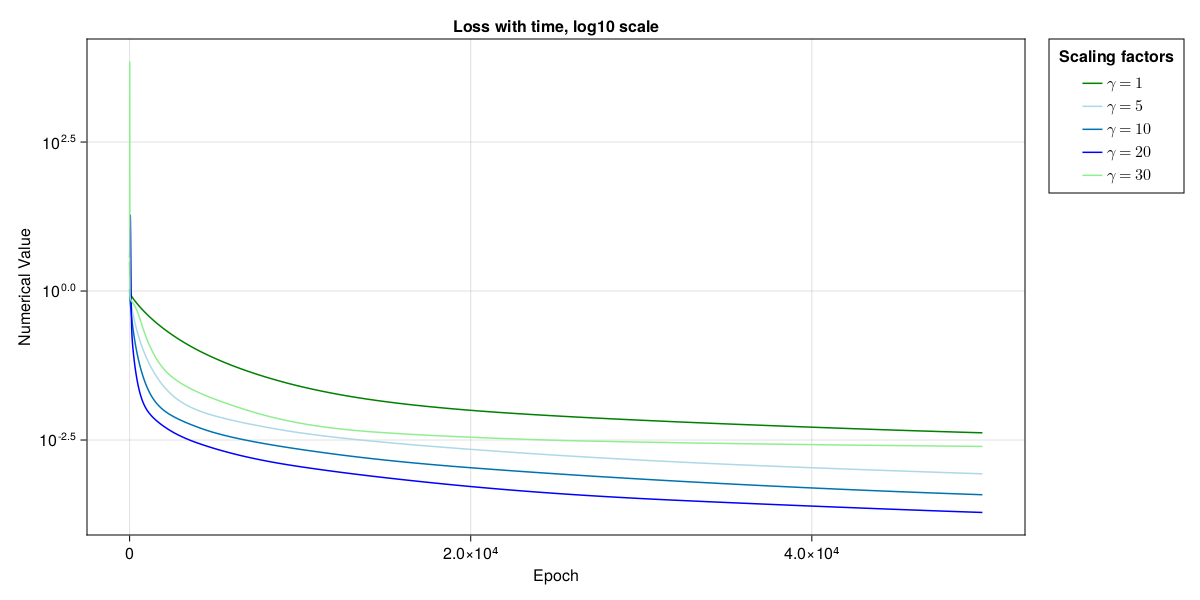

In [84]:
fig = Figure(resolution=(1200,600))
grid = fig[1,1] = GridLayout()
ax1 = Axis(grid[1,1],xlabel="Epoch",ylabel="Numerical Value",title="Loss with time, log10 scale",yscale=log10)
s1 = CairoMakie.lines!(ax1,dt[:],L1[:],color=:green,label=L"γ=1")
s2 = CairoMakie.lines!(ax1,dt[:],L2[:],color=:lightblue,label=L"γ=5")
s3 = CairoMakie.lines!(ax1,dt[:],L3[:],label=L"γ=10")
s4 = CairoMakie.lines!(ax1,dt[:],L4[:],color=:blue,label=L"γ=20")
s5 = CairoMakie.lines!(ax1,dt[:],L5[:],color=:lightgreen,label=L"γ=30")
grid[1, 2] = Legend(fig, ax1, "Scaling factors", valign=:top, orientation=:vertical)
fig

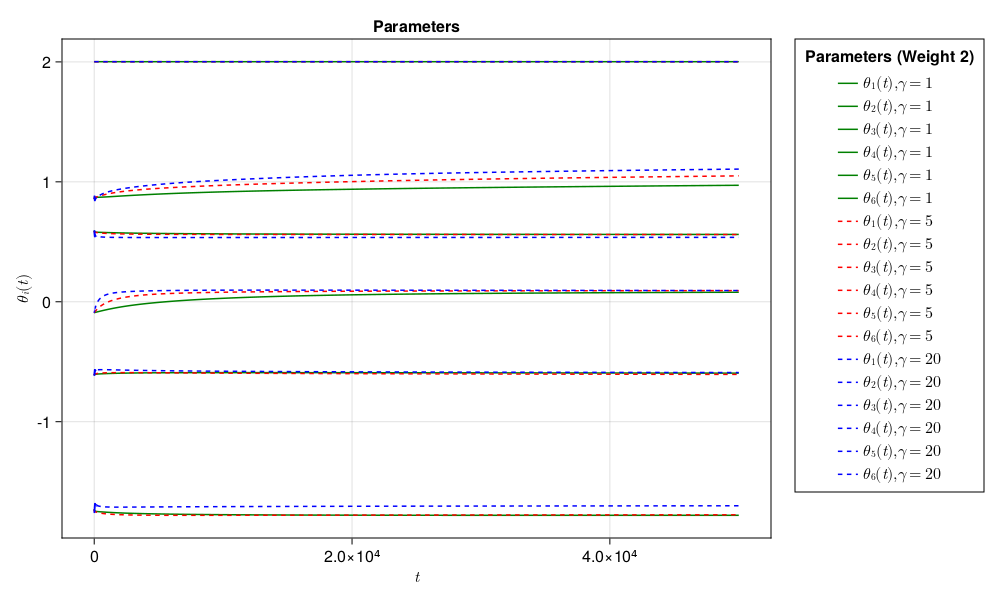

In [125]:
fig = Figure(resolution=(1000, 600))

# Creating a grid layout for the figure: 1 row, 2 columns
# The first column for the plot, the second for the legend
grid = fig[1, 1] = GridLayout()
ax1 = Axis(grid[1, 1], title="Parameters", xlabel=L"t", ylabel=L"θ_i(t)")

# Plotting data
for i = 1:6
    lines!(ax1, dt[:], θ_s1[:,i], label=L"θ_{%$i}(t), γ=1",color=:green)
end
for i = 1:6
    lines!(ax1, dt[:], θ_s2[:,i], label=L"θ_{%$i}(t), γ=5",color=:red,linestyle=:dash)
end
for i = 1:6
    lines!(ax1, dt[:], θ_s4[:,i], label=L"θ_{%$i}(t), γ=20",color=:blue,linestyle=:dash)
end
# for i = 1:3
#     lines!(ax1, dt[:], θ_s5[:,i], label=L"θ_{%$i}(t), γ=30",color=:red,linestyle=:dash)
# end

# Adjusting the layout to leave space for the legend outside the plot
grid[1, 2] = Legend(fig, ax1, "Parameters (Weight 2)", valign=:top, orientation=:vertical)
fig

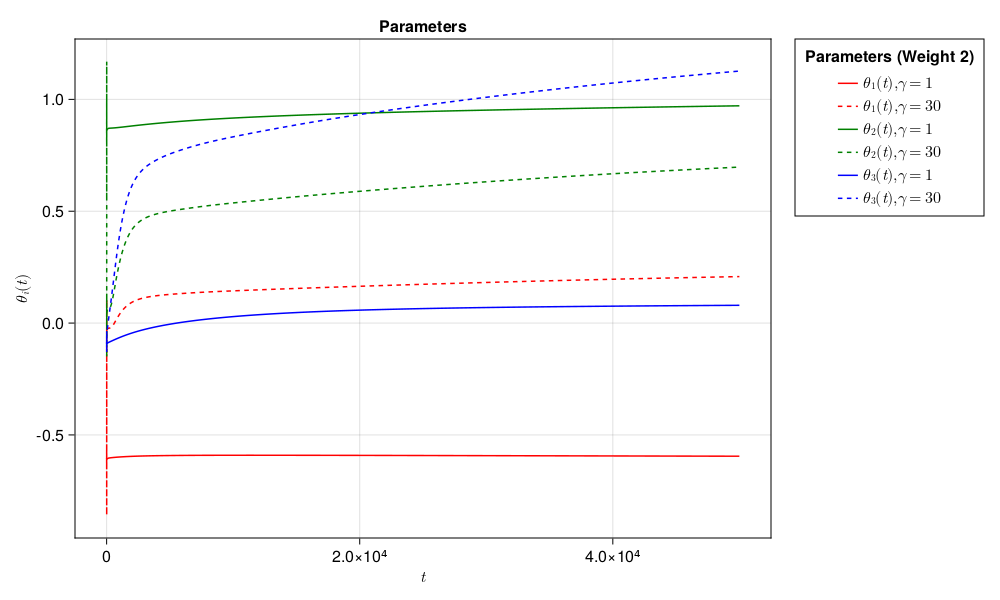

In [137]:
fig = Figure(resolution=(1000, 600))

# Creating a grid layout for the figure: 1 row, 2 columns
# The first column for the plot, the second for the legend
grid = fig[1, 1] = GridLayout()
ax1 = Axis(grid[1, 1], title="Parameters", xlabel=L"t", ylabel=L"θ_i(t)")

# Plotting data

colors = [:red, :green, :blue, :cyan, :black, :orange]

# Plotting data with specified colors
for i = 1:3
    lines!(ax1, dt[:], θ_s1[:,i], label=L"θ_{%$i}(t), γ=1", color=colors[i])
    lines!(ax1, dt[:], θ_s5[:,i], label=L"θ_{%$i}(t), γ=30", color=colors[i], markersize=4, linestyle=:dash)
end


# Adjusting the layout to leave space for the legend outside the plot
grid[1, 2] = Legend(fig, ax1, "Parameters (Weight 2)", valign=:top, orientation=:vertical)
fig